In [25]:
import cv2
from matplotlib import pyplot as plt
import numpy

def cartoon(img_rgb): 
    img_rgb = cv2.resize(img_rgb, (1080,720)) 
    numDownSamples = 0  
    numBilateralFilters = 15 

    img_color = img_rgb 
    for _ in range(numDownSamples): 
        img_color = cv2.pyrDown(img_color) 
         
    for _ in range(numBilateralFilters): 
        img_color = cv2.bilateralFilter(img_color, 9, 9, 7) 

    for _ in range(numDownSamples): 
        img_color = cv2.pyrUp(img_color) 

    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) 
    img_blur = cv2.medianBlur(img_gray, 3) 

    # detect and enhance edges 
    img_edge = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 8) 
    (x,y,z) = img_color.shape 
    img_edge = cv2.resize(img_edge,(y,x))  
    img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)

    return cv2.bitwise_and(img_color, img_edge) 
  
   
inp = cv2.imread("2.jpg")
res = cartoon(inp)
 
cv2.imwrite("Cartoon version.jpg", res) 

cv2.imshow("Cartoon version", res) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

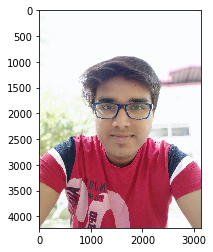

In [26]:
plt.imshow(cv2.cvtColor(inp, cv2.COLOR_BGR2RGB))

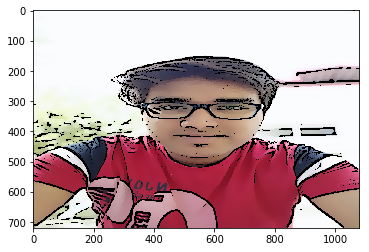

In [27]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))